
# SIMULATION PROJECT 

## SALESIAN POLYTECHNIC UNIVERSITY

### MEMBERS:   DAMIAN ANDRES TELLO JIMENEZ
###                        VERONICA GABRIELA VILLA MATUTE



Llegada de Cliente: Impresiones-1 a la hora 6.00., buscando: impresiones
Llegada de Cliente: Personalizados-1 a la hora 11.00., buscando: personalizados
El Cliente: Impresiones-1 , espero a ser atendido: 17.00.
Llegada de Cliente: Diseno-1 a la hora 17.00., buscando: diseno
El cliente Impresiones-1 , es atendido a las: 17.00.
El Cliente: Impresiones-1 que solicito el servicio: impresiones ha sido atendido, a la hora 18.00.
Llegada de Cliente: Laser-1 a la hora 25.00., buscando: laser
El Cliente: Diseno-1 , espero a ser atendido: 26.00.
El cliente Diseno-1 , es atendido a las: 26.00.
El Cliente: Diseno-1 que solicito el servicio: diseno ha sido atendido, a la hora 29.00.
El Cliente: Laser-1 , espero a ser atendido: 30.00.
El cliente Laser-1 , es atendido a las: 30.00.
El Cliente: Personalizados-1 , espero a ser atendido: 31.00.
El cliente Personalizados-1 , es atendido a las: 31.00.
Llegada de Cliente: Laser-2 a la hora 33.00., buscando: laser
El Cliente: Laser-1 que solicito el servici

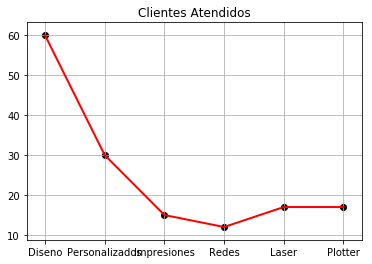

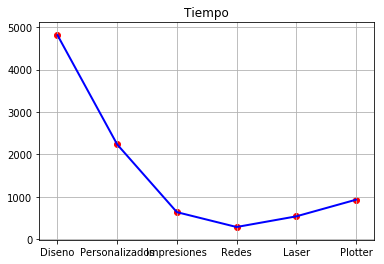

In [21]:
import matplotlib.pyplot as pp
import simpy
import random
import numpy as np
%matplotlib inline

class Cliente:
    def __init__(self, nombre, servicio):
        self.nombre = nombre
        self.servicio = servicio

#DECLARACION DE VARIABLES
MAX_CLIENTES = random.randint(35, 200)
NUM_EMPLEADOS = 2
MAX_CLIENTES_SIMUL = 3
MAX_TAREAS = 2
MAX_TIEMPO_ESPERA = (5, 30)
DISENO = round(MAX_CLIENTES * (.4))
PERSONALIZADOS = round(MAX_CLIENTES * (.2))
IMPRESIONES = round(MAX_CLIENTES * (.1))
REDES = round(MAX_CLIENTES * (.08))
LASER = round(MAX_CLIENTES * (.11))
PLOTTER = round(MAX_CLIENTES * (.11))
TIEMPO_DISENO = [1, 4]
TIEMPO_PERSONALIZADOS = [3, 5]
TIEMPO_IMPRESIONES = [1, 3]
TIEMPO_REDES = [1, 2]
TIEMPO_LASER = [3, 7]
TIEMPO_PLOTTER = [2, 4]
INTERVALO_LLEGADA = 6
CONTADORES= {}
CONTADORES['DISENO']=0
CONTADORES['PERSONALIZADOS']=0
CONTADORES['IMPRESIONES']=0
CONTADORES['REDES']=0
CONTADORES['LASER']=0
CONTADORES['PLOTTER']=0
TIEMPOS_C= {}
TIEMPOS_C['DISENO']=0
TIEMPOS_C['PERSONALIZADOS']=0
TIEMPOS_C['IMPRESIONES']=0
TIEMPOS_C['REDES']=0
TIEMPOS_C['LASER']=0
TIEMPOS_C['PLOTTER']=0
TIEMPOS= {}
TIEMPOS['DISENO']=0
TIEMPOS['PERSONALIZADOS']=0
TIEMPOS['IMPRESIONES']=0
TIEMPOS['REDES']=0
TIEMPOS['LASER']=0
TIEMPOS['PLOTTER']=0
PROMEDIOS= {}
PROMEDIOS['DISENO']=0
PROMEDIOS['PERSONALIZADOS']=0
PROMEDIOS['IMPRESIONES']=0
PROMEDIOS['REDES']=0
PROMEDIOS['LASER']=0
PROMEDIOS['PLOTTER']=0

#DECLARACION DE CLASES
class Empresa(object):
    
    def __init__(self, env, num_empleados, max_tareas, num_clientes_llegan, tiempo_espera_atencion,
                 tiempo_diseno, tiempo_personalizados,
                 tiempo_impresiones, tiempo_redes,
                 tiempo_laser,
                 tiempo_plotter):
        self.env = env
        self.num_empleados = simpy.Resource(env, num_empleados)
        self.max_tareas = simpy.Resource(env, max_tareas)
        self.num_clientes_llegan = simpy.Resource(env, num_clientes_llegan)
        self.max_tiempo_espera_atencion = tiempo_espera_atencion
        self.tiempo_diseno = tiempo_diseno
        self.tiempo_personalizados = tiempo_personalizados
        self.tiempo_impresiones = tiempo_impresiones
        self.tiempo_redes = tiempo_redes
        self.tiempo_laser = tiempo_laser
        self.tiempo_plotter = tiempo_plotter
        
    def atencion(self, cliente, empresa):

        if (cliente.servicio == 'diseno'):
            TIEMPOS_C['DISENO'] = env.now
            yield self.env.timeout(
                random.randint(self.tiempo_diseno[0], self.tiempo_diseno[1]))
            print('El Cliente: %s que solicito el servicio: %s ha sido atendido, a la hora %.2f.' % (cliente.nombre,
                                                                                                     cliente.servicio,
                                                                                                     env.now))

            TIEMPOS_C['DISENO'] = abs(TIEMPOS_C['DISENO']-env.now)
            TIEMPOS['DISENO']+=TIEMPOS_C['DISENO']

        if (cliente.servicio == 'personalizados'):
            TIEMPOS_C['PERSONALIZADOS'] = env.now
            yield self.env.timeout(
                random.randint(self.tiempo_personalizados[0], self.tiempo_personalizados[1]))
            print('El Cliente: %s que solicito el servicio: %s ha sido atendido, a la hora %.2f.' % (cliente.nombre,
                                                                                                     cliente.servicio,
                                                                                                     env.now))
            TIEMPOS_C['PERSONALIZADOS'] = abs(TIEMPOS_C['PERSONALIZADOS'] - env.now)
            TIEMPOS['PERSONALIZADOS'] += TIEMPOS_C['PERSONALIZADOS']

        if (cliente.servicio == 'impresiones'):
            TIEMPOS_C['IMPRESIONES'] = env.now
            yield self.env.timeout(
                random.randint(self.tiempo_impresiones[0],
                               self.tiempo_impresiones[1]))
            print('El Cliente: %s que solicito el servicio: %s ha sido atendido, a la hora %.2f.' % (cliente.nombre,
                                                                                                     cliente.servicio,
                                                                                                     env.now))
            TIEMPOS_C['IMPRESIONES'] = abs(TIEMPOS_C['IMPRESIONES'] - env.now)
            TIEMPOS['IMPRESIONES'] += TIEMPOS_C['IMPRESIONES']

        if (cliente.servicio == 'redes'):
            TIEMPOS_C['REDES'] = env.now
            yield self.env.timeout(
                random.randint(self.tiempo_redes[0],
                               self.tiempo_redes[1]))
            print('El Cliente: %s que solicito el servicio: %s ha sido atendido, a la hora %.2f.' % (cliente.nombre,
                                                                                                     cliente.servicio,
                                                                                                     env.now))
            TIEMPOS_C['REDES'] = abs(TIEMPOS_C['REDES'] - env.now)
            TIEMPOS['REDES'] += TIEMPOS_C['REDES']

        if (cliente.servicio == 'laser'):
            TIEMPOS_C['LASER'] = env.now
            yield self.env.timeout(
                random.randint(self.tiempo_laser[0],
                               self.tiempo_laser[1]))
            print('El Cliente: %s que solicito el servicio: %s ha sido atendido, a la hora %.2f.' % (cliente.nombre,
                                                                                                     cliente.servicio,
                                                                                                     env.now))
            TIEMPOS_C['LASER'] = abs(TIEMPOS_C['LASER'] - env.now)
            TIEMPOS['LASER'] += TIEMPOS_C['LASER']

        if (cliente.servicio == 'plotter'):
            TIEMPOS_C['PLOTTER'] = env.now
            yield self.env.timeout(
                random.randint(self.tiempo_plotter[0],
                               self.tiempo_plotter[1]))
            print('El Cliente: %s que solicito el servicio: %s ha sido atendido, a la hora %.2f.' % (cliente.nombre,
                                                                                                     cliente.servicio,
                                                                                                     env.now))
            TIEMPOS_C['PLOTTER'] = abs(TIEMPOS_C['PLOTTER'] - env.now)
            TIEMPOS['PLOTTER'] += TIEMPOS_C['PLOTTER']

        
    def tiempo_cliente(self, cliente, empresa):
        with empresa.max_tareas.request() as atencionEmpresa:
            yield atencionEmpresa
            print('El cliente %s , es atendido a las: %.2f.' % (cliente.nombre, env.now))
            yield env.process(empresa.atencion(cliente, empresa))

def llegada(env, cliente, empresa):
    print('Llegada de Cliente: %s a la hora %.2f., buscando: %s' % (cliente.nombre, env.now,cliente.servicio))

    with empresa.num_clientes_llegan.request() as clienteLlega:
        yield clienteLlega
        yield env.timeout(random.randint(empresa.max_tiempo_espera_atencion[0], empresa.max_tiempo_espera_atencion[1]))
        print('El Cliente: %s , espero a ser atendido: %.2f.' % (cliente.nombre, env.now))
        yield env.process(empresa.tiempo_cliente(cliente, empresa))

def ejecutar(env, num_empleados, max_tareas, num_clientes_llegan, tiempo_espera_atencion,
                        tiempo_diseno, tiempo_personalizados,
                        tiempo_impresiones, tiempo_redes,
                        tiempo_laser,
                        tiempo_plotter, intervalo):
    empresa = Empresa(env, num_empleados, max_tareas, num_clientes_llegan, tiempo_espera_atencion,
                          tiempo_diseno, tiempo_personalizados,
                          tiempo_impresiones, tiempo_redes,
                          tiempo_laser,
                          tiempo_plotter)

    estado = True
    while estado == True:

        opcionGenera = random.randint(1, 6)

        
        sobrepasa_maximo = True
        while sobrepasa_maximo == True:
            if ((opcionGenera == 1) and (CONTADORES['DISENO'] == DISENO)):
                opcionGenera = random.randint(1, 6)
            else:
                sobrepasa_maximo = False

        if opcionGenera == 1:
            yield env.timeout(random.randint(intervalo - 2, intervalo + 2))
            cliente = Cliente('Diseno-%d' % (CONTADORES['DISENO'] + 1), 'diseno')
            env.process(llegada(env, cliente, empresa))
            CONTADORES['DISENO'] += 1
            TIEMPOS['DISENO'] = env.now


        sobrepasa_maximo = True
        while sobrepasa_maximo == True:
            if ((opcionGenera == 2) and (CONTADORES['PERSONALIZADOS'] == PERSONALIZADOS)):
                opcionGenera = random.randint(1, 6)
            else:
                sobrepasa_maximo = False

        if opcionGenera == 2:
            yield env.timeout(random.randint(intervalo - 2, intervalo + 2))
            cliente = Cliente('Personalizados-%d' % (CONTADORES['PERSONALIZADOS'] + 1), 'personalizados')
            env.process(llegada(env, cliente, empresa))
            CONTADORES['PERSONALIZADOS'] += 1
            TIEMPOS['PERSONALIZADOS'] = env.now

        sobrepasa_maximo = True
        while sobrepasa_maximo == True:
            if ((opcionGenera == 3) and (CONTADORES['IMPRESIONES'] == IMPRESIONES)):
                opcionGenera = random.randint(1, 6)
            else:
                sobrepasa_maximo = False

        if opcionGenera == 3:
            yield env.timeout(random.randint(intervalo - 2, intervalo + 2))
            cliente = Cliente('Impresiones-%d' % (CONTADORES['IMPRESIONES'] + 1), 'impresiones')
            env.process(llegada(env, cliente, empresa))
            CONTADORES['IMPRESIONES'] += 1
            TIEMPOS['IMPRESIONES'] = env.now

        
        sobrepasa_maximo = True
        while sobrepasa_maximo == True:
            if ((opcionGenera == 4) and (CONTADORES['REDES'] == REDES)):
                opcionGenera = random.randint(1, 6)
            else:
                sobrepasa_maximo = False

        if opcionGenera == 4:
            yield env.timeout(random.randint(intervalo - 2, intervalo + 2))
            cliente = Cliente('Redes-%d' % (CONTADORES['REDES'] + 1), 'redes')
            env.process(llegada(env, cliente, empresa))
            CONTADORES['REDES'] += 1
            TIEMPOS['REDES'] = env.now

        sobrepasa_maximo = True
        while sobrepasa_maximo == True:
            if ((opcionGenera == 5) and (CONTADORES['LASER'] == LASER)):
                opcionGenera = random.randint(1, 6)
            else:
                sobrepasa_maximo = False

        if opcionGenera == 5:
            yield env.timeout(random.randint(intervalo - 2, intervalo + 2))
            cliente = Cliente('Laser-%d' % (CONTADORES['LASER'] + 1), 'laser')
            env.process(llegada(env, cliente, empresa))
            CONTADORES['LASER'] += 1
            TIEMPOS['LASER'] = env.now

        
        sobrepasa_maximo = True
        while sobrepasa_maximo == True:
            if ((opcionGenera == 6) and (CONTADORES['PLOTTER'] == PLOTTER)):
                opcionGenera = random.randint(1, 6)
            else:
                sobrepasa_maximo = False

        if opcionGenera == 6:
            yield env.timeout(random.randint(intervalo - 2, intervalo + 2))
            cliente = Cliente('Plotter-%d' % (CONTADORES['PLOTTER'] + 1), 'plotter')
            env.process(llegada(env, cliente, empresa))
            CONTADORES['PLOTTER'] += 1
            TIEMPOS['PLOTTER'] = env.now
        if ((CONTADORES['DISENO'] >= DISENO) and (CONTADORES['PERSONALIZADOS'] >= PERSONALIZADOS) and (
                CONTADORES['IMPRESIONES'] >= IMPRESIONES) and
                (CONTADORES['REDES'] >= REDES) and (CONTADORES['LASER'] >= LASER) and
                (CONTADORES['PLOTTER'] >= PLOTTER)):
          
            estado = False
random.seed(77)
env = simpy.Environment()
env.process(ejecutar(env, NUM_EMPLEADOS, MAX_TAREAS, MAX_CLIENTES_SIMUL, MAX_TIEMPO_ESPERA,
                                TIEMPO_DISENO, TIEMPO_PERSONALIZADOS, TIEMPO_IMPRESIONES,
                                TIEMPO_REDES, TIEMPO_LASER,
                                TIEMPO_PLOTTER, INTERVALO_LLEGADA))
env.run(until=2000)

PROMEDIOS['DISENO']=TIEMPOS['DISENO'] / CONTADORES['DISENO']
PROMEDIOS['PERSONALIZADOS']=TIEMPOS['PERSONALIZADOS'] / CONTADORES['PERSONALIZADOS']
PROMEDIOS['IMPRESIONES']=TIEMPOS['IMPRESIONES'] / CONTADORES['IMPRESIONES']
PROMEDIOS['REDES']=TIEMPOS['REDES'] / CONTADORES['REDES']
PROMEDIOS['LASER']=TIEMPOS['LASER'] / CONTADORES['LASER']
PROMEDIOS['PLOTTER']=TIEMPOS['PLOTTER'] / CONTADORES['PLOTTER']

print('\n----PROYECTO INTERCICLO SIMULACION----')
print('RESULTADOS:')
print('\n')
print('NUMERO DE CLIENTES ATENDIDOS:')
print(CONTADORES, '\n')
print('TIEMPOS DE ATENCION:')
print(TIEMPOS, '\n')
print('PROMEDIO DE TIEMPO DE ATENCION:')
print(PROMEDIOS, "\n")
print('\n')
print('GRAFICAS:')
# GRAFICAS
y = (CONTADORES['DISENO'], CONTADORES['PERSONALIZADOS'], CONTADORES['IMPRESIONES'], CONTADORES['REDES'],
     CONTADORES['LASER'], CONTADORES['PLOTTER'])
x = ["Diseno", "Personalizados", "Impresiones", "Redes", "Laser", "Plotter"]
xn = range(len(x))
pp.plot(xn, y,linewidth=2, color='red')
pp.xticks(xn, x)
pp.scatter(xn, y, color='black')
pp.grid(True)
pp.title("Clientes Atendidos")
pp.show()

y = (TIEMPOS['DISENO'], TIEMPOS['PERSONALIZADOS'], TIEMPOS['IMPRESIONES'], TIEMPOS['REDES'],
     TIEMPOS['LASER'], TIEMPOS['PLOTTER'])
x = ["Diseno", "Personalizados", "Impresiones", "Redes", "Laser", "Plotter"]
xn = range(len(x))
pp.plot(xn, y,linewidth=2, color='blue')
pp.xticks(xn, x)
pp.scatter(xn, y, color='red')
pp.grid(True)
pp.title("Tiempo")
pp.show()